T5:
codex:
0.2117 | Hits@3: 0.3890 | Hits@10: 0.5607 | MRR: 0.3278
+0.2429 | Hits@3: 0.3953 | Hits@10: 0.5848 | MRR: 0.3422
time:12

fb15k:
+hits1: 0.1918 | Hits@3: 0.2840 | Hits@10: 0.4010 | MRR: 0.2519
0.1820 | Hits@3: 0.2813 | Hits@10: 0.3869 | MRR: 0.2406
time: 21

Wn18rr:
+0.2666 | Hits@3: 0.3985 | Hits@10: 0.5165 | MRR: 0.3445
0.2587 | Hits@3: 0.3731 | Hits@10: 0.4911 | MRR: 0.3295
time: 6



llama:
codex: 
mrr: 0.359 & hits:1: 0.293 & hits3: 0.398 & hits10: 0.514
+mrr: 0.415 & 0.331 & 0.434 & 0.541 
10,51
time:10,46

wn18rr:
0.304 & 0.256 & 0.341 & 0.406
+0.353 & 0.432 & 0.500  & 0.415
time:5,4
4,01

fb15k:
0.271 & 0.227 & 0.294 & 0.382
+0.298 & 0.240 & 0.317  & 0.400
time:29,43
23,31







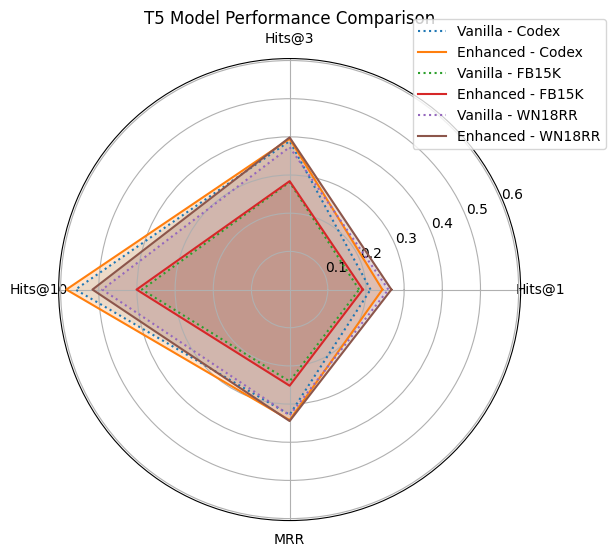

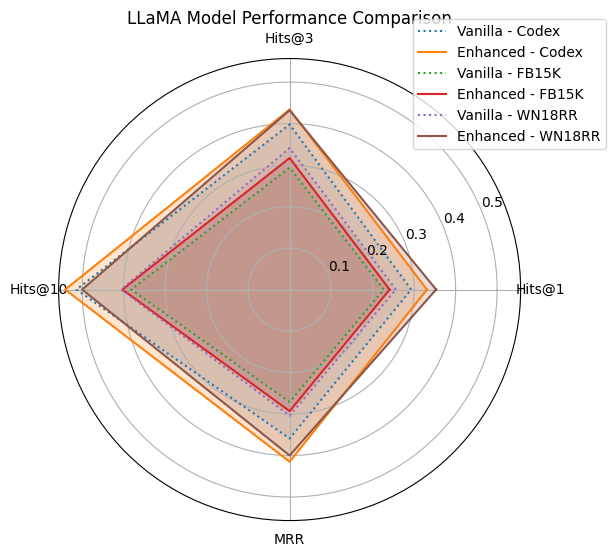

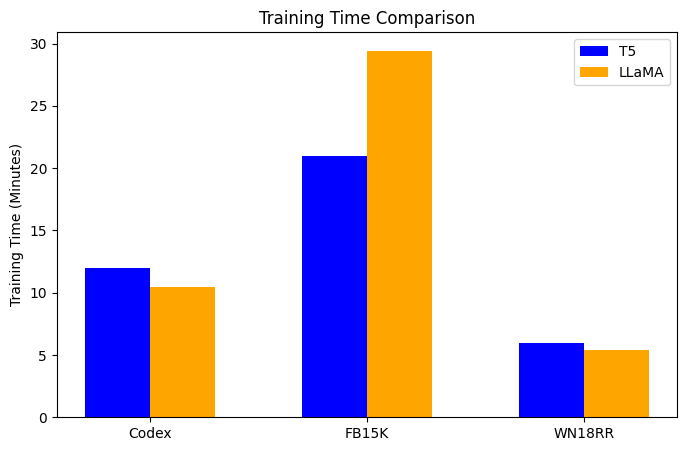

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the models
datasets = ["Codex", "FB15K", "WN18RR"]
metrics = ["Hits@1", "Hits@3", "Hits@10", "MRR"]

# Performance for Vanilla and Enhanced Models
t5_vanilla = [
    [0.212, 0.389, 0.561, 0.328],  # Codex
    [0.1820, 0.2813, 0.3869, 0.2406],  # FB15K
    [0.2587, 0.3731, 0.4911, 0.3295]   # WN18RR # WN18RR
]

t5_enhanced = [
    [0.243, 0.395, 0.585, 0.342],  # Codex
    [0.1918, 0.2840, 0.4010, 0.2519],  # FB15K
    [0.2666, 0.3985, 0.5165, 0.3445] 
    
]

llama_vanilla = [
    [0.293, 0.398, 0.514, 0.359],      # Codex
    [0.227, 0.294, 0.382, 0.271],      # FB15K
    [0.256, 0.341, 0.406, 0.304]       # WN18RR
]

llama_enhanced = [
    [0.331, 0.434, 0.541, 0.415],      # Codex
    [0.241, 0.317, 0.403, 0.293],      # FB15K
    [0.353, 0.432, 0.500, 0.400]       # WN18RR
]

# Radar Chart Function
def plot_radar_chart(vanilla, enhanced, title):
    labels = ["Hits@1", "Hits@3", "Hits@10", "MRR"]
    num_vars = len(labels)
    
    # Compute angles for the radar chart (add an extra angle to close the loop)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first angle at the end

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for i, dataset in enumerate(["Codex", "FB15K", "WN18RR"]):
        # Close the loop by repeating the first value at the end
        vanilla_values = vanilla[i] + [vanilla[i][0]]
        enhanced_values = enhanced[i] + [enhanced[i][0]]
        
        ax.plot(angles, vanilla_values, label=f"Vanilla - {dataset}", linestyle="dotted")
        ax.fill(angles, vanilla_values, alpha=0.1)

        ax.plot(angles, enhanced_values, label=f"Enhanced - {dataset}")
        ax.fill(angles, enhanced_values, alpha=0.2)

    ax.set_xticks(angles[:-1])  # Remove extra angle label
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.show()

# Run the function again
plot_radar_chart(t5_vanilla, t5_enhanced, "T5 Model Performance Comparison")
plot_radar_chart(llama_vanilla, llama_enhanced, "LLaMA Model Performance Comparison")

# Bar Chart for Training Time
t5_times = [12, 21, 6]  # Codex, FB15K, WN18RR
llama_times = [10.46, 29.43, 5.4]  # Codex, FB15K, WN18RR

bar_width = 0.3
x = np.arange(len(datasets))

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - bar_width/2, t5_times, bar_width, label="T5", color="blue")
ax.bar(x + bar_width/2, llama_times, bar_width, label="LLaMA", color="orange")

ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_ylabel("Training Time (Minutes)")
ax.set_title("Training Time Comparison")
ax.legend()
plt.show()


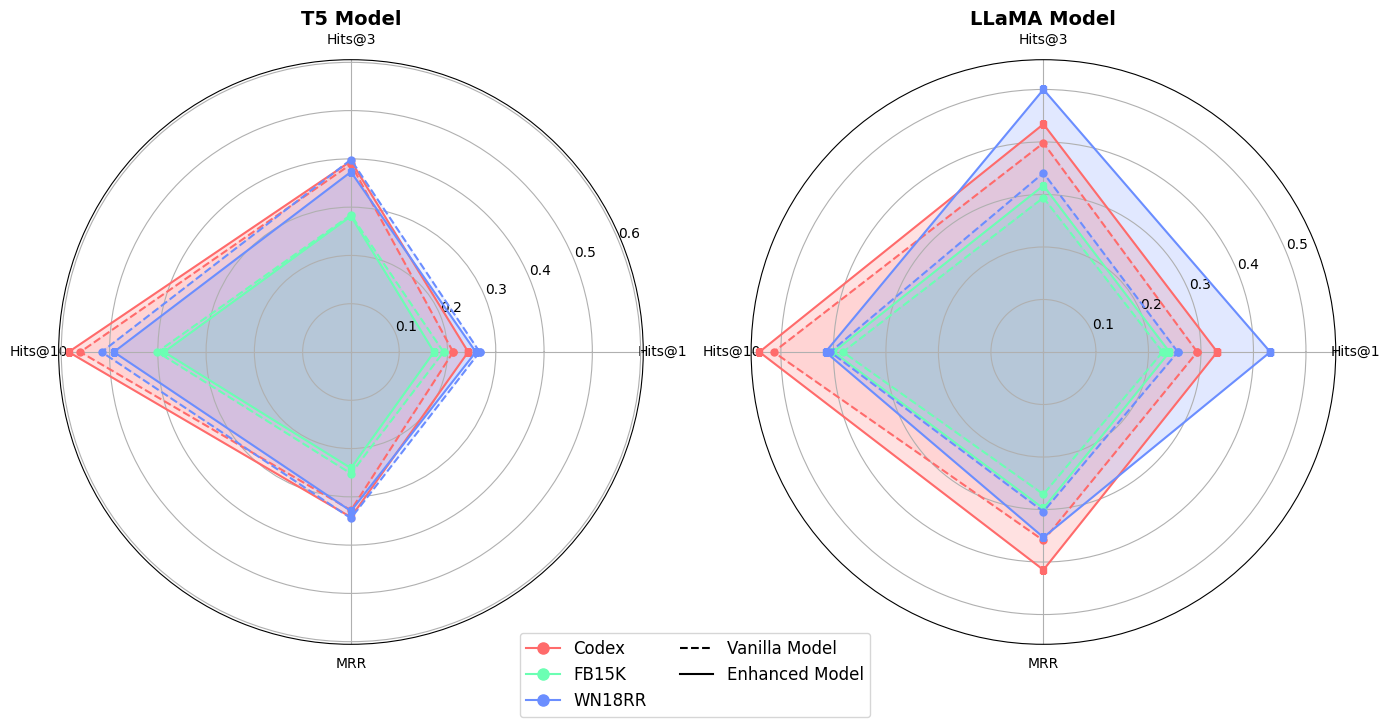

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_radar_charts(vanilla_t5, enhanced_t5, vanilla_llama, enhanced_llama):
    labels = ["Hits@1", "Hits@3", "Hits@10", "MRR"]
    num_vars = len(labels)

    # Compute angles for radar chart (closing the loop)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Closing the loop

    # Define modern vibrant colors
    colors = ["#FF6B6B", "#6BFFB3", "#6B8EFF"]  # Codex, FB15K, WN18RR
    dataset_names = ["Codex", "FB15K", "WN18RR"]

    # Create subplots (side by side)
    fig, axs = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

    model_names = ["T5 Model", "LLaMA Model"]
    model_data = [(vanilla_t5, enhanced_t5), (vanilla_llama, enhanced_llama)]

    for ax, (vanilla, enhanced), title in zip(axs, model_data, model_names):
        for i, dataset in enumerate(dataset_names):
            # Close the loop by repeating the first value at the end
            vanilla_values = vanilla[i] + [vanilla[i][0]]
            enhanced_values = enhanced[i] + [enhanced[i][0]]

            # Plot Vanilla Model (dashed line)
            ax.plot(angles, vanilla_values, linestyle="dashed", color=colors[i], 
                    marker="o", markersize=5, label=f"{dataset} (Vanilla)")
            ax.fill(angles, vanilla_values, alpha=0.1, color=colors[i])

            # Plot Enhanced Model (solid line)
            ax.plot(angles, enhanced_values, linestyle="-", color=colors[i], 
                    marker="s", markersize=5, label=f"{dataset} (Enhanced)")
            ax.fill(angles, enhanced_values, alpha=0.2, color=colors[i])

        # Set axis labels and title
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        ax.set_title(title, fontsize=14, fontweight="bold")

    # Custom legend elements (only one legend for both plots)
    vanilla_line = mlines.Line2D([], [], color="black", linestyle="dashed", label="Vanilla Model")
    enhanced_line = mlines.Line2D([], [], color="black", linestyle="-", label="Enhanced Model")
    dataset_legend = [mlines.Line2D([], [], color=colors[i], marker="o", markersize=8, label=dataset_names[i]) 
                      for i in range(len(dataset_names))]

    # Add a common legend at the bottom of the figure
    fig.legend(
        handles= dataset_legend + [vanilla_line, enhanced_line], 
        loc="lower center",  # Position the legend at the bottom
        bbox_to_anchor=(0.5, -0.05),  # Center the legend below the figure
        ncol=2,  # Arrange items in 3 columns
        fontsize=12  # Adjust font size for better readability
    )

    plt.tight_layout()  # Adjust layout for better spacing
    plt.savefig("radar_chart.png", dpi=300, bbox_inches="tight")
    plt.show()

    

# Run the function with both models' data
plot_radar_charts(t5_vanilla, t5_enhanced, llama_vanilla, llama_enhanced)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def plot_combined_figure(vanilla_t5, enhanced_t5, vanilla_llama, enhanced_llama, t5_times, llama_times):
    labels = ["Hits@1", "Hits@3", "Hits@10", "MRR"]
    num_vars = len(labels)

    # Compute angles for radar chart (closing the loop)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Closing the loop

    # Define colors
    colors = ["#FF6B6B", "#6BFFB3", "#6B8EFF"]  # Codex, FB15K, WN18RR
    dataset_names = ["Codex", "FB15K", "WN18RR"]

    # Create a 1-row, 3-column figure layout
    fig, axs = plt.subplots(1, 3, figsize=(20, 7))

    # Convert the first two subplots into polar (radar charts)
    axs[0] = fig.add_subplot(1, 3, 1, polar=True)
    axs[1] = fig.add_subplot(1, 3, 2, polar=True)

    model_names = ["T5 Model", "LLaMA Model"]
    model_data = [(vanilla_t5, enhanced_t5), (vanilla_llama, enhanced_llama)]

    # Create Radar Charts
    for ax, (vanilla, enhanced), title in zip(axs[:2], model_data, model_names):
        for i, dataset in enumerate(dataset_names):
            vanilla_values = vanilla[i] + [vanilla[i][0]]
            enhanced_values = enhanced[i] + [enhanced[i][0]]

            # Plot Vanilla Model (dashed line)
            ax.plot(angles, vanilla_values, linestyle="dashed", color=colors[i], 
                    marker="o", markersize=5, label=f"{dataset} (Vanilla)")
            ax.fill(angles, vanilla_values, alpha=0.1, color=colors[i])

            # Plot Enhanced Model (solid line)
            ax.plot(angles, enhanced_values, linestyle="-", color=colors[i], 
                    marker="s", markersize=5, label=f"{dataset} (Enhanced)")
            ax.fill(angles, enhanced_values, alpha=0.2, color=colors[i])
            ax.patch.set_visible(False)
            ax.spines['polar'].set_visible(True)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        ax.set_title(title, fontsize=14)
         # Keep polar frame
       
       
       
    
       
    # Custom Legend
    vanilla_line = mlines.Line2D([], [], color="black", linestyle="dashed", label="Vanilla Model")
    enhanced_line = mlines.Line2D([], [], color="black", linestyle="-", label="Enhanced Model")
    dataset_legend = [mlines.Line2D([], [], color=colors[i], marker="o", markersize=8, label=dataset_names[i]) 
                      for i in range(len(dataset_names))]

    # Bar Chart for Training Time (3rd subplot)
    ax_bar = axs[2]  # The third subplot is for the bar chart
    bar_width = 0.3
    x = np.arange(len(dataset_names))

    ax_bar.bar(x - bar_width/2, t5_times, bar_width, label="T5", color="orange")
    ax_bar.bar(x + bar_width/2, llama_times, bar_width, label="LLaMA", color="blue")

    ax_bar.set_xticks(x)
    ax_bar.set_xticklabels(dataset_names)
    ax_bar.set_ylabel("Training Time (Hours)")
    ax_bar.set_title("Training Time", fontsize =14)
    ax_bar.legend()
    for side in ["top", "right", "left", "bottom"]:
        ax_bar.spines[side].set_visible(False)

    # Add a common legend at the bottom
    fig.legend(handles=[vanilla_line, enhanced_line] + dataset_legend, 
               loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12)

    plt.tight_layout()
    plt.savefig("combined_figure.png", dpi=300, bbox_inches="tight")
    plt.show()


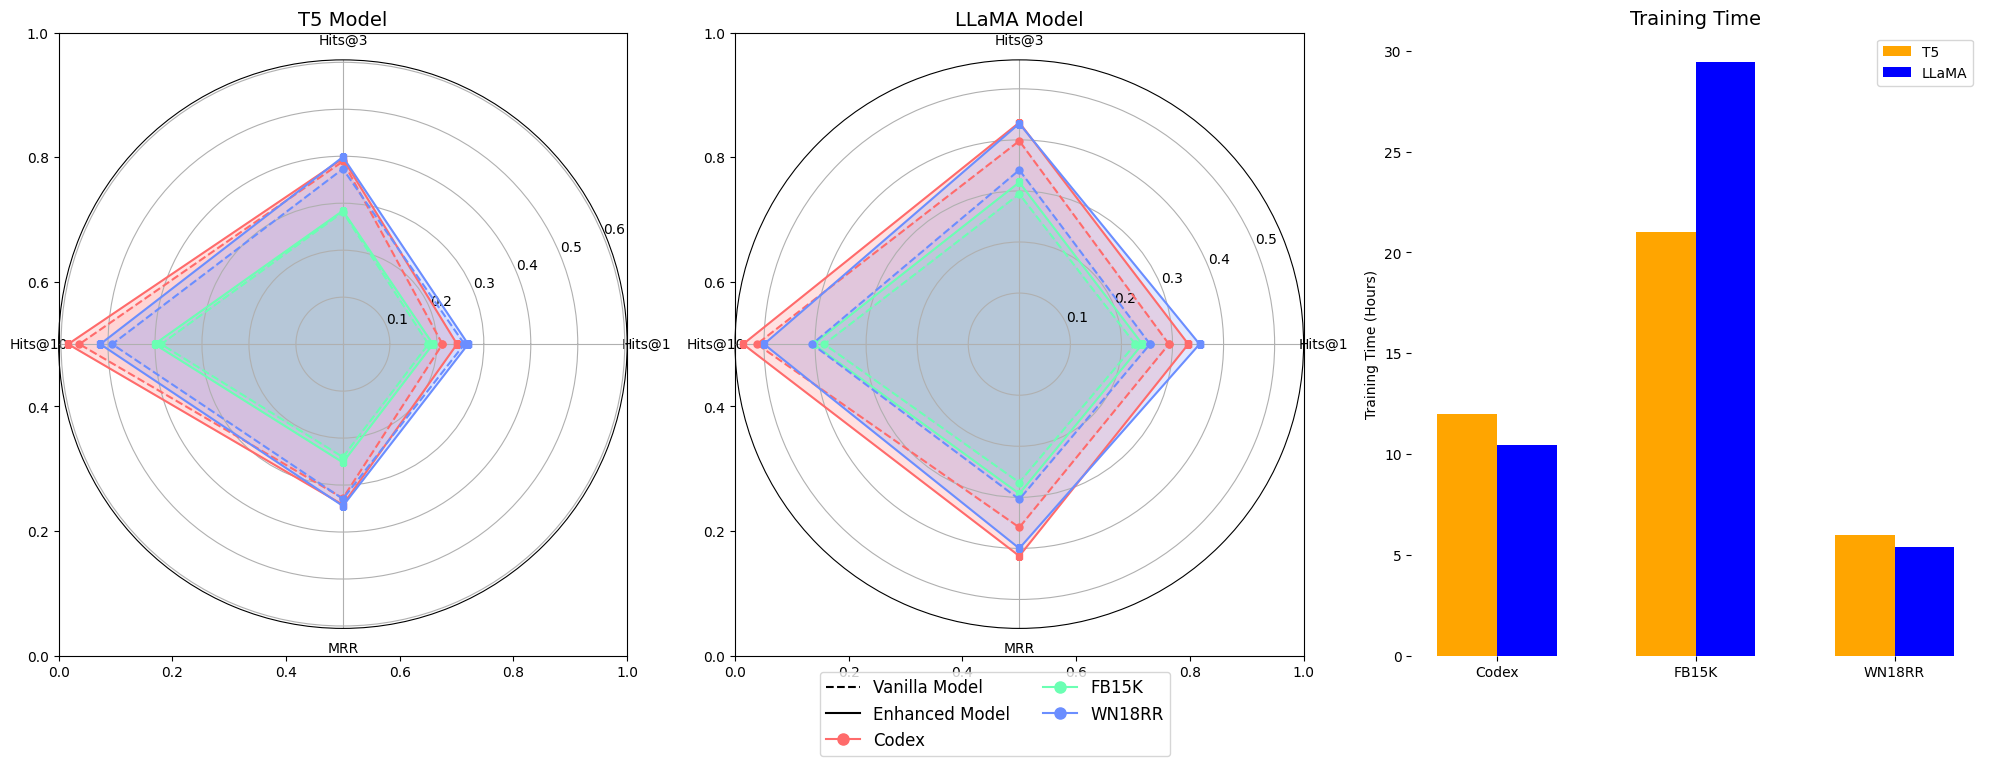

In [4]:
plot_combined_figure(t5_vanilla, t5_enhanced, llama_vanilla, llama_enhanced, t5_times, llama_times)